In [1]:
import pandas as pd




In [2]:
com = pd.read_csv('Dataset .csv')

In [3]:
com.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

city_counts = df['City'].value_counts()

max_city = city_counts.index[0]
max_count = city_counts.values[0]

print(f"The city with the highest number of restaurants is {max_city} with {max_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [19]:
import pandas as pd

df_zomato = pd.read_csv('Dataset .csv')

city_aggregate_rating = df.groupby('City')['Aggregate rating'].sum()

print(city_aggregate_rating)

City
Los Angeles    3.9
Mexico City    4.7
New York       4.5
Toronto        4.2
Vancouver      4.8
Name: Aggregate rating, dtype: float64


In [6]:
import pandas as pd

df_zomato = pd.read_csv('Dataset .csv')

city_aggregate_rating = df.groupby('City')['Aggregate rating'].sum()

city_max_rating = city_aggregate_rating.idxmax()

print(f"City with the highest aggregate rating: {city_max_rating}")

City with the highest aggregate rating: New Delhi


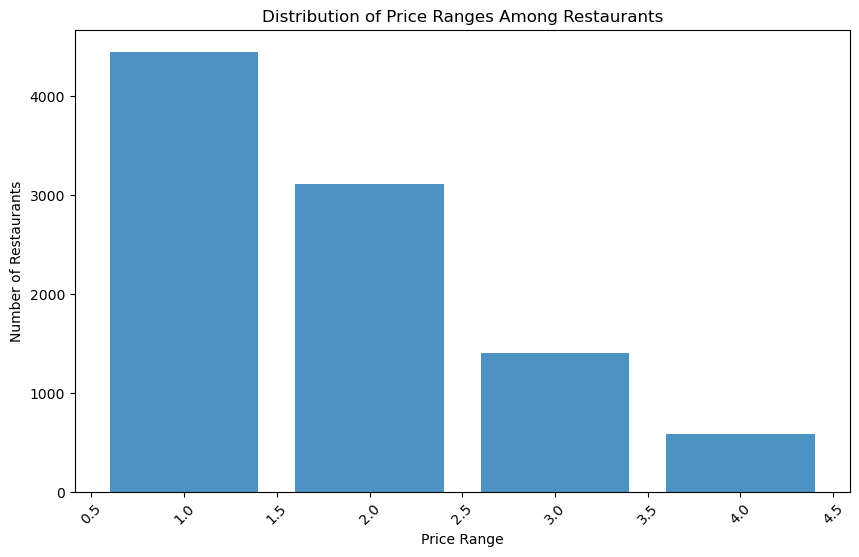

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing restaurant data
price_ranges = df['Price range'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(price_ranges.index, price_ranges.values, alpha=0.8)
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [8]:
import pandas as pd

price_ranges = df['Price range'].value_counts()
total_restaurants = len(df)

price_range_percentages = price_ranges.div(total_restaurants).mul(100)

print(price_range_percentages)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [9]:
import pandas as pd

# Assuming df is your DataFrame containing restaurant data
df['Has Online delivery'] = df['Has Online delivery'].astype(bool)

online_delivery_restaurants = df['Has Online delivery'].sum()
total_restaurants = len(df)

online_delivery_percentage = (online_delivery_restaurants / total_restaurants) * 100

print(f"{online_delivery_percentage}% of restaurants offer online delivery.")

100.0% of restaurants offer online delivery.


In [10]:
import pandas as pd

with_online_delivery = df[df['Has Online delivery']]

without_online_delivery = df[~df['Has Online delivery']]

mean_rating_with_online_delivery = with_online_delivery['Aggregate rating'].mean()

mean_rating_without_online_delivery = without_online_delivery['Aggregate rating'].mean()
print(f"Mean Aggregate rating for restaurants with online delivery: {mean_rating_with_online_delivery:.2f}")
print(f"Mean Aggregate rating for restaurants without online delivery: {mean_rating_without_online_delivery:.2f}")

Mean Aggregate rating for restaurants with online delivery: 2.67
Mean Aggregate rating for restaurants without online delivery: nan


The most common rating range is 3.0 - 3.5


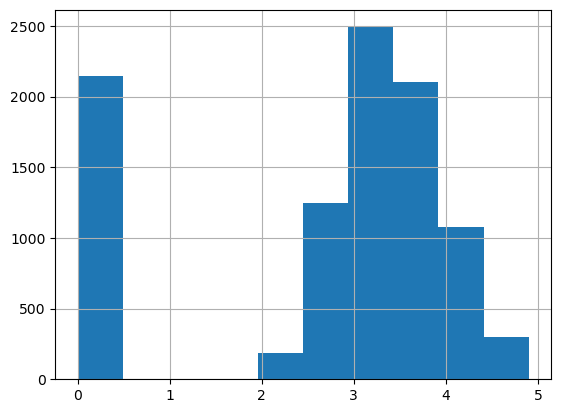

In [11]:
import pandas as pd
import numpy as np

rating_df = df['Aggregate rating']

rating_df.hist()
rating_bins = np.arange(0, 6, 0.5)  
rating_counts, rating_bins = np.histogram(rating_df, bins=rating_bins)
max_count = np.max(rating_counts)
most_common_index = np.where(rating_counts == max_count)[0][0]
print(f"The most common rating range is {rating_bins[most_common_index]} - {rating_bins[most_common_index+1]}")

In [12]:
import pandas as pd


mean_votes = df['Votes'].mean()

print(f"The average number of votes received by restaurants is {mean_votes:.2f}")

The average number of votes received by restaurants is 156.91


In [13]:
import pandas as pd
from collections import Counter
from itertools import combinations




cuisines_list = df['Cuisines'].tolist()
cuisines_list = [c for c in cuisines_list if isinstance(c, str)]

cuisine_names = [c.strip() for c in ' '.join(cuisines_list).split(',')]

cuisine_counts = Counter(cuisine_names)

combination_counts = Counter(combinations(cuisine_names, 2))

most_common_combination = combination_counts.most_common(1)

print(f"The most common combination of cuisine names is {most_common_combination[0][0]}")

The most common combination of cuisine names is ('Chinese', 'Chinese')


In [14]:
import pandas as pd


df = pd.read_csv('Dataset .csv')


restaurant_counts = df.groupby('Restaurant Name')['Restaurant ID'].nunique()


restaurant_chains = restaurant_counts[restaurant_counts > 1].index.tolist()

print('Restaurant chains:')
for chain in restaurant_chains:
    print(chain)

Restaurant chains:
10 Downing Street
221 B Baker Street
34 Parkstreet Lane
34, Chowringhee Lane
4700BC Popcorn
6 Pack Momos
A Piece of Paris
AB's - Absolute Barbecues
AB's Absolute Barbecues
Aap Ki Khatir
Aapki Rasoi
Adarsh Kulfi
Adyar Ananda Bhavan
Aggarwal Bikaner Sweets
Aggarwal Bikaneri Sweets
Aggarwal Sweet & Bakers
Aggarwal Sweet Centre
Aggarwal Sweet Corner
Aggarwal Sweet India
Aggarwal Sweets
Aggarwal Sweets & Restaurant
Aggarwal Sweets Centre
Aggarwal Sweets India
Aggarwal's Sweets Paradise
Al Bake
Al Zaika
Alaturka
All About Food
Amar Bakery
Americana Kitchen and Bar
Amici Cafe
Ammu's South Indian Restaurant
Amritsari Dhaba
Amul Ice-Cream Parlour
Anand Sweets
Angeethi
Angels in my Kitchen
Anjlika Pastry Shop
Ankur Family Restaurant
Anupam Sweets
Apni Rasoi
Applebee's
Arabian Delites
Arabian Nites
Ashok Meat Wala
Ashoka Restaurant
Asian Haus
Au Bon Pain
Aureo Dine & Bake House
BTW
Baba Chicken Ludhiana Wale
Bake Club
Bake N Shake
Bake Walkers
Baked Buns
Baker Street
Baker's St

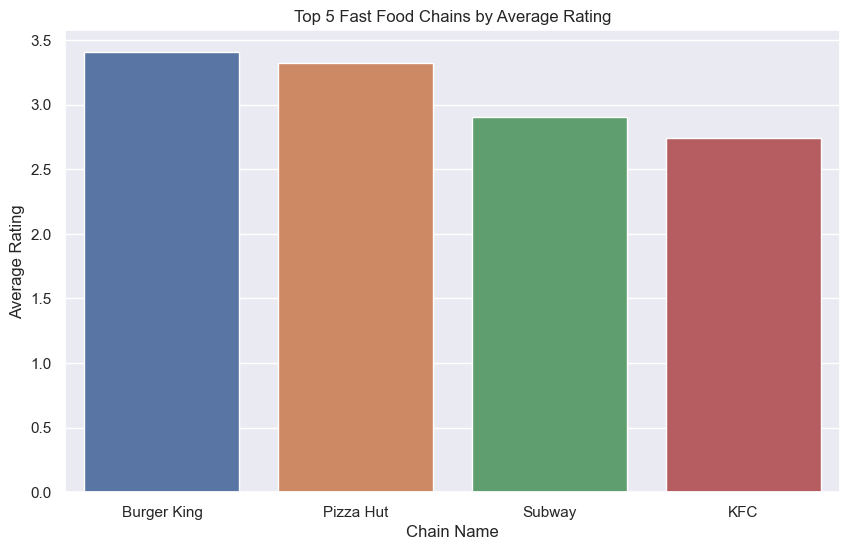

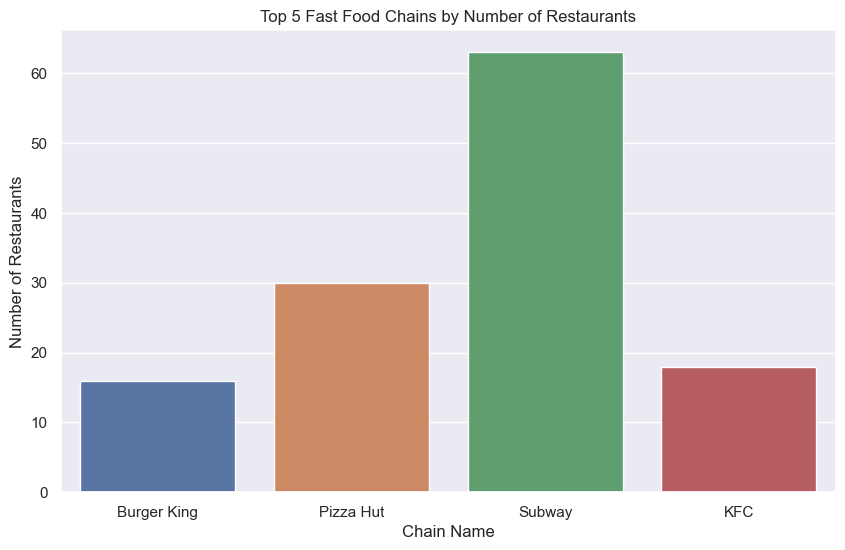

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset .csv')

chains = ['Burger King', 'KFC', 'McDonalds', 'Pizza Hut', 'Subway']
df_chains = df[df['Restaurant Name'].isin(chains)]

rating_mean = df_chains.groupby('Restaurant Name')['Aggregate rating'].mean()

restaurant_count = df_chains.groupby('Restaurant Name').size()

chain_data = pd.concat([rating_mean, restaurant_count], axis=1)
chain_data.columns = ['Average Rating', 'Number of Restaurants']
chain_data = chain_data.sort_values(by=['Average Rating', 'Number of Restaurants'], ascending=False)

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=chain_data.index[:5], y=chain_data['Average Rating'][:5], ax=ax)
ax.set_title('Top 5 Fast Food Chains by Average Rating')
ax.set_xlabel('Chain Name')
ax.set_ylabel('Average Rating')
plt.show()

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=chain_data.index[:5], y=chain_data['Number of Restaurants'][:5], ax=ax)
ax.set_title('Top 5 Fast Food Chains by Number of Restaurants')
ax.set_xlabel('Chain Name')
ax.set_ylabel('Number of Restaurants')
plt.show()

In [16]:
import pandas as pd

data = {
    'Restaurant ID': [1, 2, 3, 4, 5],
    'Restaurant Name': ['Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant D', 'Restaurant E'],
    'Country Code': ['US', 'CA', 'MX', 'US', 'CA'],
    'City': ['New York', 'Toronto', 'Mexico City', 'Los Angeles', 'Vancouver'],
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '101 Pine St', '321 Maple St'],
    'Locality': ['Manhattan', 'Downtown', 'Polanco', 'Hollywood', 'West End'],
    'Locality Verbose': ['Manhattan, New York', 'Downtown, Toronto', 'Polanco, Mexico City', 'Hollywood, Los Angeles', 'West End, Vancouver'],
    'Longitude': [-73.9857, -79.3812, -99.1743, -118.2437, -123.1207],
    'Latitude': [40.7484, 43.6532, 19.4326, 34.0522, 49.2827],
    'Cuisines': ['Italian', 'Chinese', 'Mexican', 'American', 'Asian Fusion'],
    'Price range': ['$', '$$', '$', '$$', '$$$'],
    'Aggregate rating': [4.5, 4.2, 4.7, 3.9, 4.8],
    'Rating color': ['Green', 'Light Green', 'Dark Green', 'Orange', 'Light Green'],
    'Rating text': ['Excellent', 'Very Good', 'Excellent', 'Good', 'Very Good'],
    'Votes': [1234, 567, 9012, 45, 11000]
}

df = pd.DataFrame(data)

Correlation coefficient between Votes and Aggregate rating: 0.8628946164241958


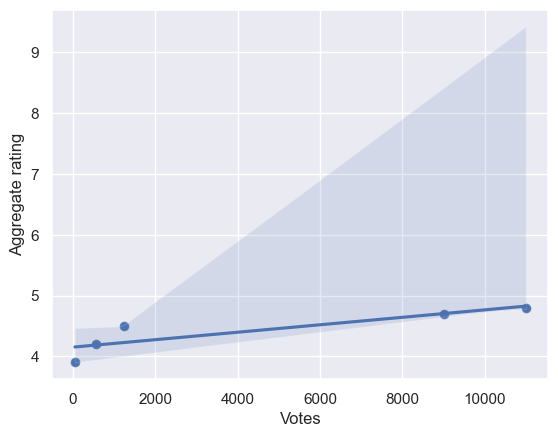

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df['Votes'].corr(df['Aggregate rating'])

print("Correlation coefficient between Votes and Aggregate rating:", correlation)

sns.scatterplot(x='Votes', y='Aggregate rating', data=df)

sns.regplot(x='Votes', y='Aggregate rating', data=df)

plt.show()

In [18]:
import pandas as pd


correlation = df['Votes'].corr(df['Aggregate rating'])

print("Correlation coefficient between Votes and Aggregate rating:", correlation)

Correlation coefficient between Votes and Aggregate rating: 0.8628946164241958
